# Mushrooms!
 * CSCI 183, Spring 2017 
 * Erin Gates, Madyson Morris, Tiffany Palmer 

"Leaves of three, let me be" helps you stay away poison oak, but how do you avoid poison mushrooms?

In seeking to answer this question, we analyzed data on various poisous and edible mushrooms and compared the  accuracies of various classification algorithms.

In [4]:
#import pandas and numpy libraries
import pandas as pd
import numpy as np
import matplotlib as plt

#import bernoulli naive bayes from scikit-learn
import sklearn as sk
#seaborn for pretty plots
import seaborn as sns

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline

#display versions of python and packages

print('pandas version ' + pd.__version__)
print('numpy version ' + np.__version__)
print('sk-learn version ' + sk.__version__)
print('seaborn version ' + sns.__version__)

pandas version 0.20.1
numpy version 1.12.1
sk-learn version 0.18.1
seaborn version 0.7.1


In [5]:
#read in data. it's comma-separated with no column names.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', sep=',', header=None,
                 error_bad_lines=False, warn_bad_lines=True, low_memory=False)
# set pandas to output all of the columns in output
pd.options.display.max_columns = 25
#show the first 5 rows
print(df.sample(n=5))

     0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 22
6553  p  f  s  n  f  s  f  c  n  b  t  ?  k  k  p  p  p  w  o  e  w  v  d
1055  e  b  s  y  t  l  f  c  b  k  e  c  s  s  w  w  p  w  o  p  k  s  g
4803  p  f  y  g  f  f  f  c  b  g  e  b  k  k  b  n  p  w  o  l  h  y  g
6849  e  b  s  n  f  n  a  c  b  n  e  ?  s  s  o  o  p  o  o  p  o  c  l
45    e  x  y  w  t  a  f  c  b  n  e  c  s  s  w  w  p  w  o  p  n  n  g


In [6]:
#manually add column names from documentation (1st col is class: e=edible,p=poisonous; rest are attributes)
df.columns = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
             'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
             'stalk-surf-above-ring','stalk-surf-below-ring','stalk-color-above-ring','stalk-color-below-ring',
             'veil-type','veil-color','ring-number','ring-type','spore-color','population','habitat']

print("Example values:\n")
print(df.iloc[3984]) #this one has a ? value - how are those treated by classifier?

Example values:

class                     e
cap-shape                 x
cap-surface               y
cap-color                 b
bruises                   t
odor                      n
gill-attachment           f
gill-spacing              c
gill-size                 b
gill-color                e
stalk-shape               e
stalk-root                ?
stalk-surf-above-ring     s
stalk-surf-below-ring     s
stalk-color-above-ring    e
stalk-color-below-ring    w
veil-type                 p
veil-color                w
ring-number               t
ring-type                 e
spore-color               w
population                c
habitat                   w
Name: 3984, dtype: object


## Exploratory Data Analysis
* What does our data look like?
* We have data for 22 features, which ones are relevant to our classification?

## How are the mushrooms distributed? 
### The 8124 mushrooms are about evenly split between edible and poisonous

e    4208
p    3916
Name: class, dtype: int64


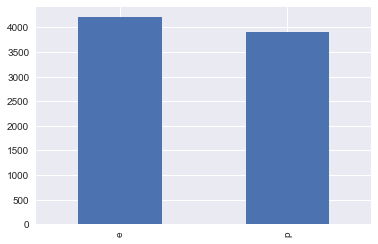

In [7]:
#show plots in notebook
%matplotlib inline

#bar chart of classes using pandas plotting
print(df['class'].value_counts())
df['class'].value_counts().plot(kind='bar')

# How are certain features correlated to classification? 
* ### We'll start by plotting counts for poisonous/edible mushrooms by feature.
* ### For some features we will use a correlation matrix for a more comprehensive view that takes into account how classification changes as certain features change

In [8]:
#seaborn factorplot to show edible/poisonous breakdown by different factors
df_forplot = df #.loc[:,('class','cap-shape','gill-color','veil-type', 'ring-type')]

## Correlation matrix from matplotlib:

In [9]:
def correlation_matrix(df,labels,matrixTitle):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 20)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title(matrixTitle)
    
    ax1.set_xticks(np.arange(0, len(labels), 1))
    ax1.set_yticks(np.arange(0, len(labels), 1))
    
    ax1.set_xticklabels(labels,fontsize=12, rotation=90)
    ax1.set_yticklabels(labels,fontsize=12)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax)
    plt.show()

## Edibility by Cap Shape
### Cap shape is not strongly correlated to classification as edible or poisonous

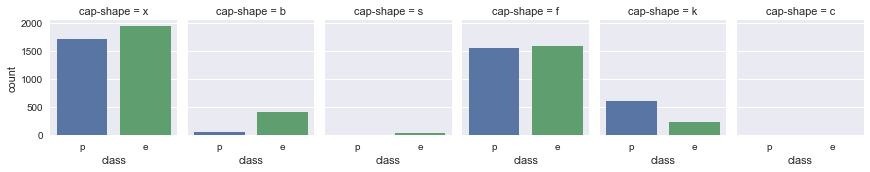

In [10]:
g = sns.factorplot("class", col="cap-shape", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Edibility by Cap Surface
### Cap surface is not strongly correlated to edibility

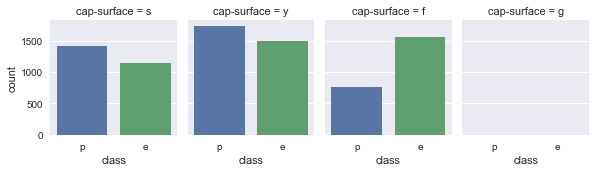

In [11]:
g = sns.factorplot("class", col="cap-surface", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Edibility by Cap Color
### Cap color is not strongly correlated to edibility

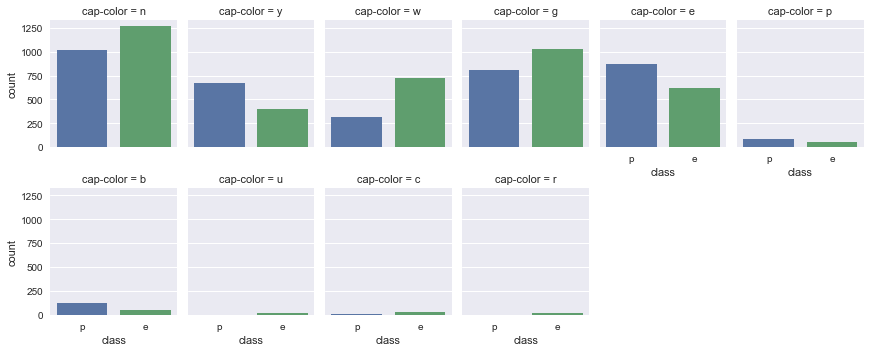

In [12]:
g = sns.factorplot("class", col="cap-color", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Edibility by Bruises
### Bruises tend to appear in edible mushrooms, but the correlation is not strong

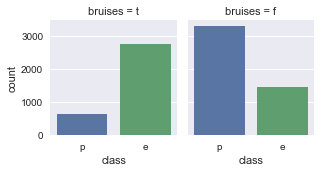

In [13]:
g = sns.factorplot("class", col="bruises", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Taking a closer look at this correlation...
It looks like there is a >0.5 correlation between bruises edibility

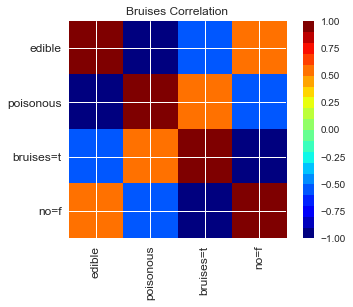

In [16]:
label = ["edible","poisonous","bruises=t","no=f"]
correlation_matrix(pd.get_dummies(df[["class","bruises"]]), label, 'Bruises Correlation')

## Edibility by Odor
### A=anise, L=Almond, and N=no odor are indicative of edibility

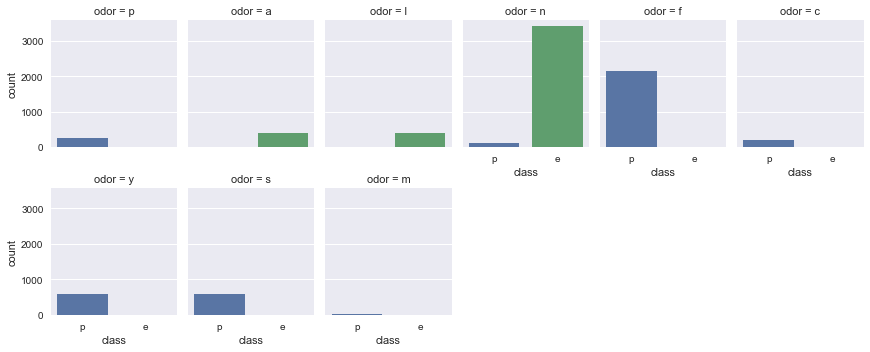

In [77]:
g = sns.factorplot("class", col="odor", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Edibility by Gill Attachment
### Gill attachment is not correlated to edibility

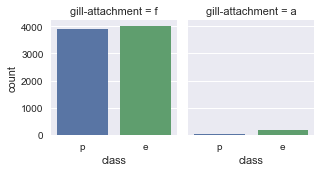

In [78]:
g = sns.factorplot("class", col="gill-attachment", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Edibility by Gill Spacing
### Gill Spacing is not correlated to edibility

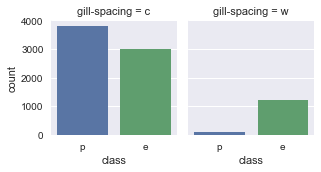

In [79]:
g = sns.factorplot("class", col="gill-spacing", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Edibility by Gill Size
### Gill Size is not correlated to edibility

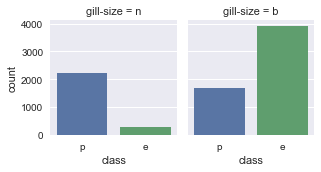

In [17]:
g = sns.factorplot("class", col="gill-size", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Taking a closer look at this correlation...
It looks like there is a >0.5 correlation between gill size and edibility

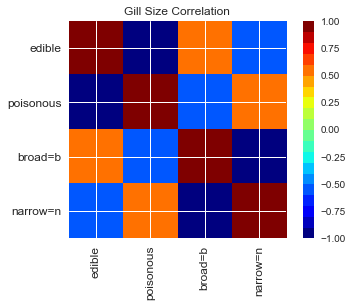

In [19]:
label = ["edible","poisonous","broad=b","narrow=n"]
correlation_matrix(pd.get_dummies(df[["class","gill-size"]]), label, 'Gill Size Correlation')

## Edibility by Gill Color
### Buff=b colored gills are indicative of a poisonous classification

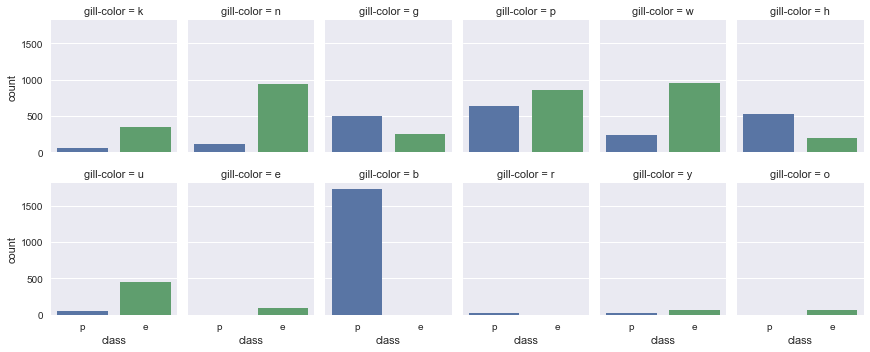

In [81]:
g = sns.factorplot("class", col="gill-color", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Taking a closer look at this correlation...
It looks like there is a >0.5 correlation between gill color and edibility

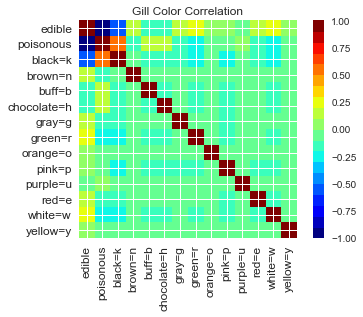

In [20]:
label = ["edible","poisonous","black=k","brown=n","buff=b","chocolate=h",
         "gray=g","green=r","orange=o","pink=p","purple=u","red=e","white=w","yellow=y"]
correlation_matrix(pd.get_dummies(df[["class","gill-color"]]), label, 'Gill Color Correlation')

## Edibility by Stalk Shape
### Stalk shape is not correlated to edibility

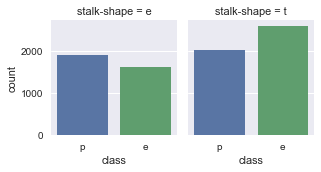

In [82]:
g = sns.factorplot("class", col="stalk-shape", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Edibility by Stalk Root
### R=rooted stalk roots are correlated to edibility

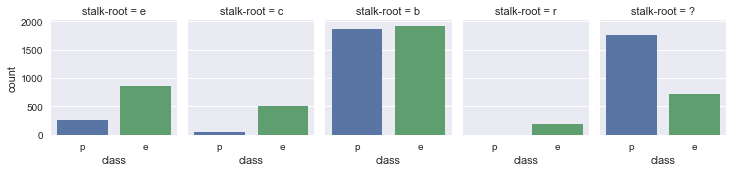

In [83]:
g = sns.factorplot("class", col="stalk-root", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Edibility by Stalk Surface Above Ring
### There is weak correlation between K=silky and poisonous classification

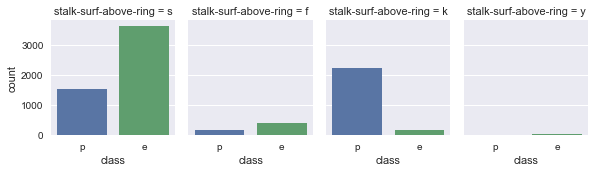

In [84]:
g = sns.factorplot("class", col="stalk-surf-above-ring", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Let's get more details on this correlation using a correlation matrix
It looks like there are two >=0.5 correlations between stalk surface and edibility

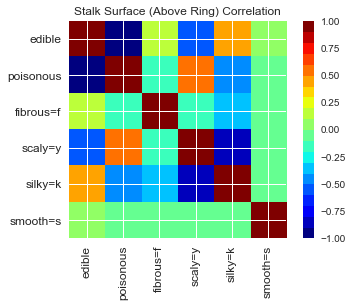

In [21]:
label = ["edible","poisonous","fibrous=f","scaly=y","silky=k","smooth=s"]
correlation_matrix(pd.get_dummies(df[["class","stalk-surf-above-ring"]]), label, 'Stalk Surface (Above Ring) Correlation')

## Edibility by Stalk Surface Below Ring
### There is weak correlation between K=silky and poisonous classification

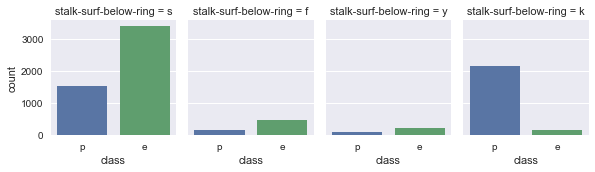

In [86]:
g = sns.factorplot("class", col="stalk-surf-below-ring", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Edibility by Stalk Color Above Ring
### Certain colors appear in our data set as  always edible or always poisonous, but the majority of mushrooms do not display these colors

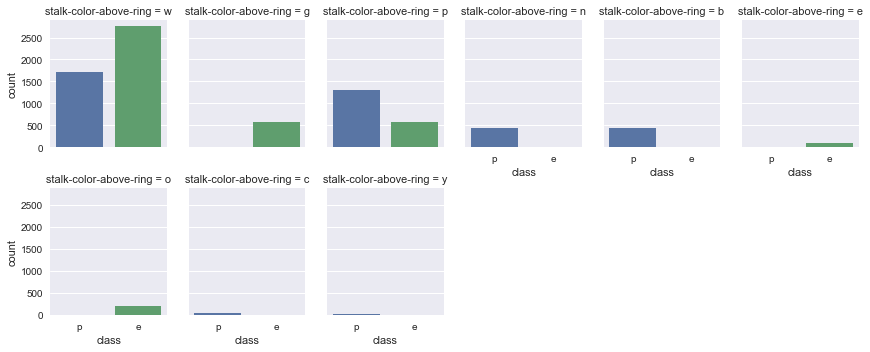

In [22]:
g = sns.factorplot("class", col="stalk-color-above-ring", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Edibility by Stalk Color Below Ring
### Certain colors appear in our data set as always edible or always poisonous, but the majority of mushrooms do not display these colors 

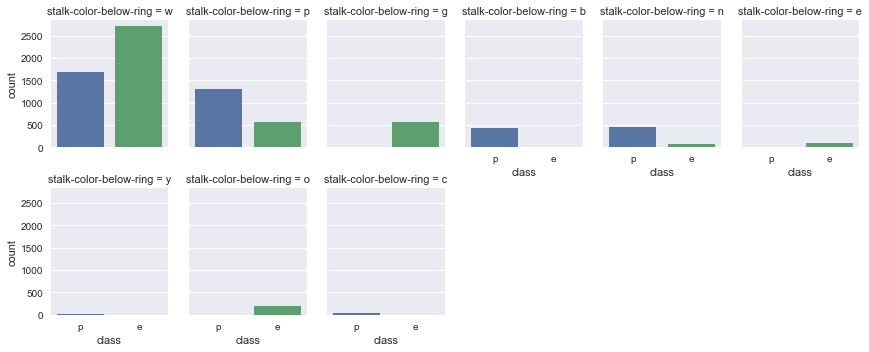

In [88]:
g = sns.factorplot("class", col="stalk-color-below-ring", data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Edibility by Veil Type
### Note, there is only one veil type, and the mushrooms are about evenly split between edible and poisonous

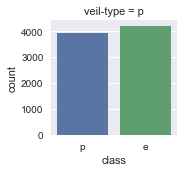

In [89]:
g = sns.factorplot("class", col='veil-type', data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

### Distribution of Veil Type
It looks like there's only one type of veil in our data set, so we can ignore that feature in our analysis!

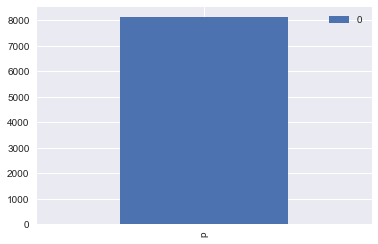

In [90]:
# Distribution for veil-type
from collections import Counter

letter_counts = Counter(df["veil-type"])
df_forveil = pd.DataFrame.from_dict(letter_counts, orient='index')
df_forveil.plot(kind="bar")

## Edibility by Veil Color
### N=brown and O=orange veils seem to be correlated with edibility

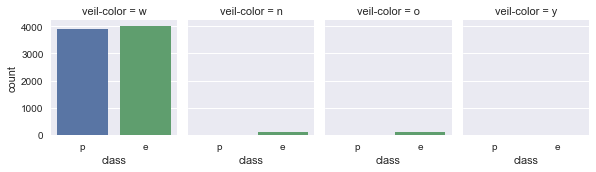

In [91]:
g = sns.factorplot("class", col='veil-color', data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Edibility by Ring Number
### T=two rings indicate edibility

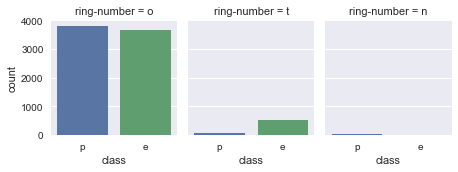

In [92]:
g = sns.factorplot("class", col='ring-number', data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Edibility by Ring Type
### N=none are entirely poisonous, F=flaring are entirely edible, P=pendant tend to be edible

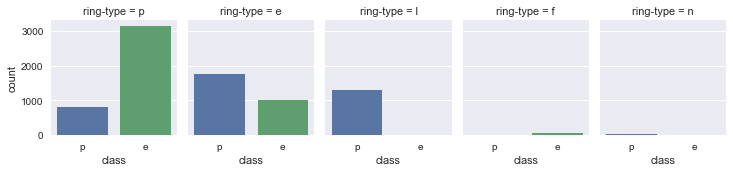

In [93]:
g = sns.factorplot("class", col='ring-type', data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Let's get more details on this correlation from a correlation matrix
There is a >0.5 correlation present between ring type and edibility

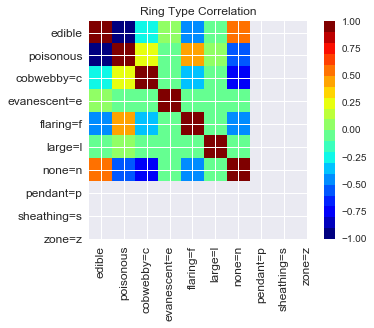

In [94]:
label = ["edible","poisonous","cobwebby=c","evanescent=e","flaring=f","large=l", "none=n","pendant=p",
         "sheathing=s","zone=z"]
correlation_matrix(pd.get_dummies(df[["class","ring-type"]]), label, 'Ring Type Correlation')

## Edibility by Spore Color
### IDK how to interpret this 

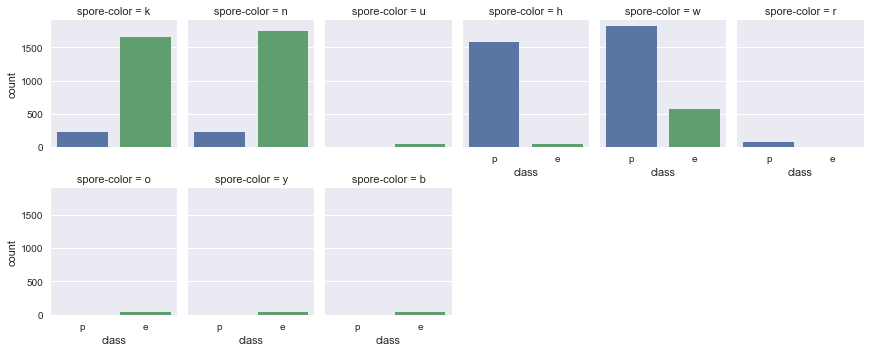

In [95]:
g = sns.factorplot("class", col='spore-color', data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Let's get more details on this correlation using a correlation matrix
There is a >0.4 correlation present between spore color and edibility

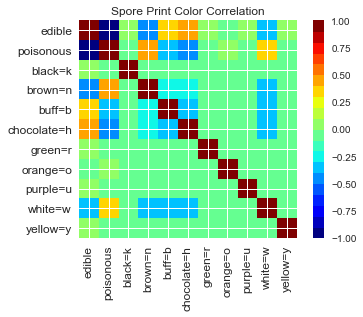

In [96]:
label = ["edible","poisonous","black=k","brown=n","buff=b","chocolate=h","green=r","orange=o","purple=u","white=w",
         "yellow=y"]
correlation_matrix(pd.get_dummies(df[["class","spore-color"]]), label, 'Spore Print Color Correlation')

## Edibility by Population
### .... 

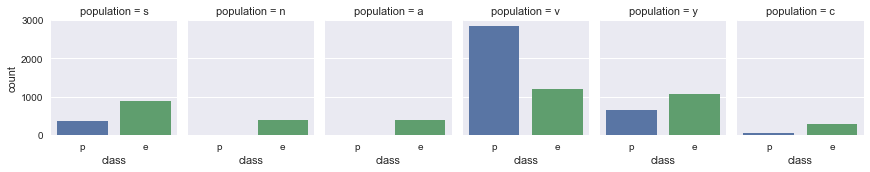

In [97]:
g = sns.factorplot("class", col='population', data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Let's get more details on this correlation using a correlation matrix
There is a >0.4 correlation between population and edibility

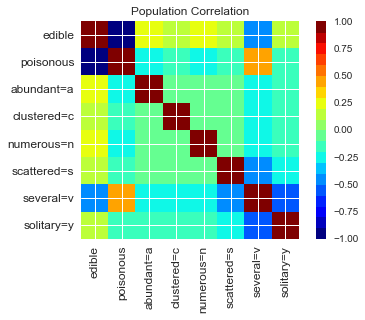

In [25]:
label = ["edible","poisonous","abundant=a","clustered=c","numerous=n", "scattered=s","several=v","solitary=y" ]
correlation_matrix(pd.get_dummies(df[["class","population"]]), label, 'Population Correlation')

## Edibility by Habitat
### W=woods habitats are correlated to edible classification
LaBarge found that L=leaves and G=grass habitats are correlated to edible classification, but our data does not support that conclusion

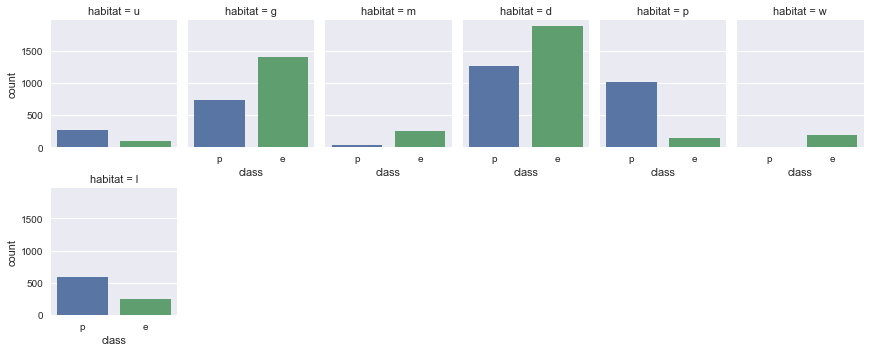

In [98]:
g = sns.factorplot("class", col='habitat', data=df_forplot,
                    kind="count", size=2.5, aspect=.8, col_wrap=6)

## Let's get more details on this correlation using a correlation matrix
It looks like there is a >0.3 correlation between u=urban habitat and poisonous classification

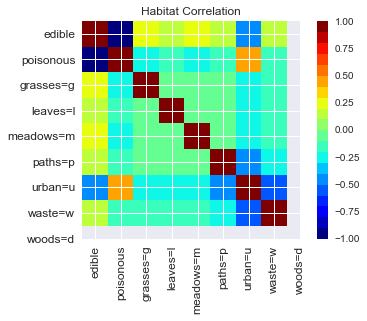

In [99]:
label = ["edible","poisonous","grasses=g","leaves=l","meadows=m","paths=p", "urban=u","waste=w","woods=d" ]
correlation_matrix(pd.get_dummies(df[["class","population"]]), label, 'Habitat Correlation')

# Try out the Classifier on Different Feature Combinations
We will split the data into 4 sets
* All 22 features
* 6 most predictive features based on prior research
* 7 most predictive features based on data point counts
* 8 most predictive features based on correlation computation (matrices)

In [100]:
#drop extraneous features
df = df.drop("veil-type", 1)

#put the features into X (everything except the 0th column)
X = pd.DataFrame(df, columns=df.columns[1:len(df.columns)], index=df.index)

#put the class values (0th column) into Y 
Y = df['class']

#encode the text category labels as numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)
#print(le.classes_)
#print(np.array(Y))
#Y values now boolean values; poison = 1
y = le.transform(Y)
#print(y_train)

#have to initialize or get error below
x = pd.DataFrame(X,columns=[X.columns[0]])
#encode each feature column and add it to x_train
for colname in X.columns:
    le.fit(X[colname])
    print(colname, le.classes_)
    x[colname] = le.transform(X[colname])

print('\nExample Feature Values - row 1 in X:')
print(X.iloc[1])
print('\nExample Encoded Feature Values - row 1 in x:')
print(x.iloc[1])
print('\nClass Values (Y):')
print(np.array(Y))
print('\nEncoded Class Values (y):')
print(y)

('cap-shape', array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object))
('cap-surface', array(['f', 'g', 's', 'y'], dtype=object))
('cap-color', array(['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y'], dtype=object))
('bruises', array(['f', 't'], dtype=object))
('odor', array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object))
('gill-attachment', array(['a', 'f'], dtype=object))
('gill-spacing', array(['c', 'w'], dtype=object))
('gill-size', array(['b', 'n'], dtype=object))
('gill-color', array(['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'], dtype=object))
('stalk-shape', array(['e', 't'], dtype=object))
('stalk-root', array(['?', 'b', 'c', 'e', 'r'], dtype=object))
('stalk-surf-above-ring', array(['f', 'k', 's', 'y'], dtype=object))
('stalk-surf-below-ring', array(['f', 'k', 's', 'y'], dtype=object))
('stalk-color-above-ring', array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object))
('stalk-color-below-ring', array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w'

# Classify

## NB run for original data set

In [36]:
#split the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1000, random_state=(42))

#initialize and fit the naive bayes classifier
from sklearn.naive_bayes import BernoulliNB
skgnb = BernoulliNB(alpha=0.02)
skgnb.fit(x_train,y_train)
train_predict = skgnb.predict(x_train)
#print(train_predict)

#see how accurate the training data was fit
from sklearn import metrics
print("Training accuracy:",metrics.accuracy_score(y_train, train_predict))

#use the trained model to predict the test values
test_predict = skgnb.predict(x_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predict))

('Training accuracy:', 0.844329028635598)
('Testing accuracy:', 0.85099999999999998)


In [37]:
print("\nClassification Report:")
print(metrics.classification_report(y_test, test_predict, target_names=['edible','poisonous']))
print("\nConfusion Matrix:")
skcm = metrics.confusion_matrix(y_test,test_predict)
#putting it into a dataframe so it prints the labels
skcm = pd.DataFrame(skcm, columns=['predicted-edible','predicted-poisonous'])
skcm['actual'] = ['edible','poisonous']
skcm = skcm.set_index('actual')

#NOTE: NEED TO MAKE SURE I'M INTERPRETING THE ROWS & COLS RIGHT TO ASSIGN THESE LABELS!
print(skcm)

print("\nScore (same thing as test accuracy?): ", skgnb.score(x_test,y_test))


Classification Report:
             precision    recall  f1-score   support

     edible       0.80      0.95      0.87       527
  poisonous       0.93      0.74      0.83       473

avg / total       0.86      0.85      0.85      1000


Confusion Matrix:
           predicted-edible  predicted-poisonous
actual                                          
edible                  499                   28
poisonous               121                  352
('\nScore (same thing as test accuracy?): ', 0.85099999999999998)


## NB run for first reduced data set (based on seed paper)

In [105]:
#drop extraneous features
df_r1 = df.loc[:,('class','odor','spore-color','stalk-surf-above-ring','stalk-color-above-ring','habitat','cap-color')]

df_r1.head()

,class,odor,spore-color,stalk-surf-above-ring,stalk-color-above-ring,habitat,cap-color
0,p,p,k,s,w,u,n
1,e,a,n,s,w,g,y
2,e,l,n,s,w,m,w
3,p,p,k,s,w,u,w
4,e,n,n,s,w,g,g


In [108]:
#put the features into X (everything except the 0th column)
X_r1 = pd.DataFrame(df_r1, columns=df_r1.columns[1:len(df_r1.columns)], index=df_r1.index)

#put the class values (0th column) into Y 
Y_r1 = df_r1['class']

#encode the text category labels as numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y_r1)
#print(le.classes_)
#print(np.array(Y))
#Y values now boolean values; poison = 1
y_r1 = le.transform(Y_r1)
#print(y_train)

#have to initialize or get error below
x_r1 = pd.DataFrame(X_r1,columns=[X_r1.columns[0]])
#encode each feature column and add it to x_train
for colname in X_r1.columns:
    le.fit(X_r1[colname])
    print(colname, le.classes_)
    x_r1[colname] = le.transform(X_r1[colname])

('odor', array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object))
('spore-color', array(['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y'], dtype=object))
('stalk-surf-above-ring', array(['f', 'k', 's', 'y'], dtype=object))
('stalk-color-above-ring', array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object))
('habitat', array(['d', 'g', 'l', 'm', 'p', 'u', 'w'], dtype=object))
('cap-color', array(['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y'], dtype=object))


In [109]:
#split the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_r1, y_r1, test_size=1000, random_state=(42))

#initialize and fit the naive bayes classifier
from sklearn.naive_bayes import BernoulliNB
skgnb = BernoulliNB(alpha=0.02)
skgnb.fit(x_train,y_train)
train_predict = skgnb.predict(x_train)
#print(train_predict)

#see how accurate the training data was fit
from sklearn import metrics
print("Training accuracy:",metrics.accuracy_score(y_train, train_predict))

#use the trained model to predict the test values
test_predict = skgnb.predict(x_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predict))

('Training accuracy:', 0.6656372824256036)
('Testing accuracy:', 0.64200000000000002)


## NB run for second reduced data set (based on counts)

In [126]:
#drop extraneous features
df_r2 = df.loc[:,('class','odor','gill-color','stalk-root','stalk-color-above-ring','ring-type','spore-color','population')]

df_r2.head()

,class,odor,gill-color,stalk-root,stalk-color-above-ring,ring-type,spore-color,population
0,p,p,k,e,w,p,k,s
1,e,a,k,c,w,p,n,n
2,e,l,n,c,w,p,n,n
3,p,p,n,e,w,p,k,s
4,e,n,k,e,w,e,n,a


In [127]:
#put the features into X (everything except the 0th column)
X_r2 = pd.DataFrame(df_r2, columns=df_r2.columns[1:len(df_r2.columns)], index=df_r2.index)

#put the class values (0th column) into Y 
Y_r2 = df_r2['class']

#encode the text category labels as numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y_r2)
#print(le.classes_)
#print(np.array(Y))
#Y values now boolean values; poison = 1
y_r2 = le.transform(Y_r2)
#print(y_train)

#have to initialize or get error below
x_r2 = pd.DataFrame(X_r2,columns=[X_r2.columns[0]])
#encode each feature column and add it to x_train
for colname in X_r2.columns:
    le.fit(X_r2[colname])
    print(colname, le.classes_)
    x_r2[colname] = le.transform(X_r2[colname])

('odor', array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object))
('gill-color', array(['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'], dtype=object))
('stalk-root', array(['?', 'b', 'c', 'e', 'r'], dtype=object))
('stalk-color-above-ring', array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object))
('ring-type', array(['e', 'f', 'l', 'n', 'p'], dtype=object))
('spore-color', array(['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y'], dtype=object))
('population', array(['a', 'c', 'n', 's', 'v', 'y'], dtype=object))


In [128]:
#split the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_r2, y_r2, test_size=1000, random_state=(42))

#initialize and fit the naive bayes classifier
from sklearn.naive_bayes import BernoulliNB
skgnb = BernoulliNB(alpha=0.02)
skgnb.fit(x_train,y_train)
train_predict = skgnb.predict(x_train)
#print(train_predict)

#see how accurate the training data was fit
from sklearn import metrics
print("Training accuracy:",metrics.accuracy_score(y_train, train_predict))

#use the trained model to predict the test values
test_predict = skgnb.predict(x_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predict))

('Training accuracy:', 0.70381807973048849)
('Testing accuracy:', 0.71399999999999997)


## NB run for third reduced data set (based on correlation matrices)

In [129]:
#drop extraneous features
df_r3 = df.loc[:,('class','bruises','gill-size','gill-color','stalk-surf-above-ring','ring-type','spore-color','population','habitat')]

df_r3.head()

,class,bruises,gill-size,gill-color,stalk-surf-above-ring,ring-type,spore-color,population,habitat
0,p,t,n,k,s,p,k,s,u
1,e,t,b,k,s,p,n,n,g
2,e,t,b,n,s,p,n,n,m
3,p,t,n,n,s,p,k,s,u
4,e,f,b,k,s,e,n,a,g


In [130]:
#put the features into X (everything except the 0th column)
X_r3 = pd.DataFrame(df_r3, columns=df_r3.columns[1:len(df_r3.columns)], index=df_r3.index)

#put the class values (0th column) into Y 
Y_r3 = df_r3['class']

#encode the text category labels as numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y_r3)
#print(le.classes_)
#print(np.array(Y))
#Y values now boolean values; poison = 1
y_r3 = le.transform(Y_r3)
#print(y_train)

#have to initialize or get error below
x_r3 = pd.DataFrame(X_r3,columns=[X_r3.columns[0]])
#encode each feature column and add it to x_train
for colname in X_r3.columns:
    le.fit(X_r3[colname])
    print(colname, le.classes_)
    x_r3[colname] = le.transform(X_r3[colname])

('bruises', array(['f', 't'], dtype=object))
('gill-size', array(['b', 'n'], dtype=object))
('gill-color', array(['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'], dtype=object))
('stalk-surf-above-ring', array(['f', 'k', 's', 'y'], dtype=object))
('ring-type', array(['e', 'f', 'l', 'n', 'p'], dtype=object))
('spore-color', array(['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y'], dtype=object))
('population', array(['a', 'c', 'n', 's', 'v', 'y'], dtype=object))
('habitat', array(['d', 'g', 'l', 'm', 'p', 'u', 'w'], dtype=object))


In [131]:
#split the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_r3, y_r3, test_size=1000, random_state=(42))

#initialize and fit the naive bayes classifier
from sklearn.naive_bayes import BernoulliNB
skgnb = BernoulliNB(alpha=0.02)
skgnb.fit(x_train,y_train)
train_predict = skgnb.predict(x_train)
#print(train_predict)

#see how accurate the training data was fit
from sklearn import metrics
print("Training accuracy:",metrics.accuracy_score(y_train, train_predict))

#use the trained model to predict the test values
test_predict = skgnb.predict(x_test)
print("Testing accuracy:",metrics.accuracy_score(y_test, test_predict))

('Training accuracy:', 0.74564851207186977)
('Testing accuracy:', 0.73599999999999999)


## Graph comparing testing accuracies of original data set and all 3 reduced sets

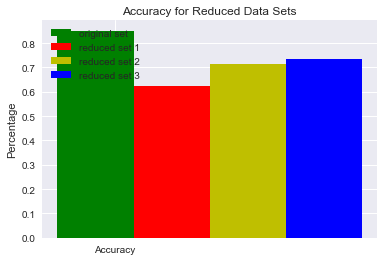

In [172]:
N = 1
ind = np.arange(N)  # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()

r0_values = (.851)
rects0 = ax.bar(ind, r0_values, width, color='g')

r1_values = (.624)
rects1 = ax.bar(ind + width, r1_values, width, color='r')

r2_values = (.714)
rects2 = ax.bar(ind + width + width, r2_values, width, color='y')

r3_values = (.736)
rects3 = ax.bar(ind + width + width + width, r3_values, width, color='b')


# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage')
ax.set_title('Accuracy for Reduced Data Sets')
ax.set_xticks(ind + width / 4)
ax.set_xticklabels(('Accuracy', 'Accuracy'))

ax.legend((rects0[0],rects1[0], rects2[0], rects3[0]),('original set','reduced set 1', 'reduced set 2', 'reduced set 3'))

    
plt.show()

## Graph of Accuracy, Precision, and Recall for Naive Bayes (orig. set) and Decision Tree

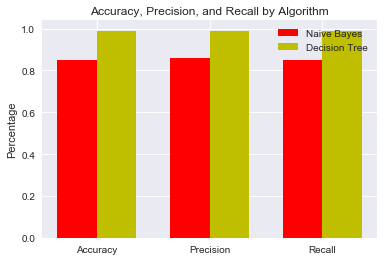

In [143]:
N = 3
nb_values = (.85, .86, .85)


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, nb_values, width, color='r')

dt_values = (.99, .99, .99)
rects2 = ax.bar(ind + width, dt_values, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage')
ax.set_title('Accuracy, Precision, and Recall by Algorithm')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Accuracy', 'Precision', 'Recall'))

ax.legend((rects1[0], rects2[0]),('Naive Bayes', 'Decision Tree'))

plt.show()

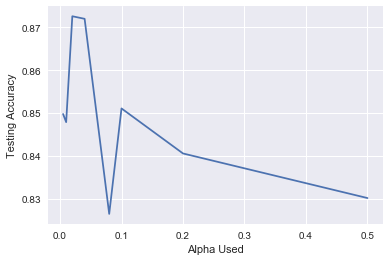

In [48]:
#graph of alphas and corresponding accuracies
a = [.005,.01,.02,.04,.08,.1,.2,.5]
b = [.8498,.8479,.8726,.872,.8265,.8511,.8406,.8302]

plt.xlabel('Alpha Used')
plt.ylabel('Testing Accuracy')
plt.plot(a, b)
plt.show()

We can see that we get our best accuracy with a smaller alpha, approximately 0.02

# K-fold Cross-validation for Naive Bayes
We cross validated for k = 5, 7, and 10. We found that higher K is more

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

#5-fold cross validation
skgnb = BernoulliNB(alpha=0.02)
skgnb.fit(x_train,y_train)
scores = cross_val_score(skgnb, x, y, cv=5)

print("5-Fold Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

5-Fold Cross Validation Accuracy: 0.76 (+/- 0.30)


In [124]:
#7-fold cross validation
#clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(skgnb, x, y, cv=7)

print("7-Fold Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

7-Fold Cross Validation Accuracy: 0.78 (+/- 0.21)


In [125]:
#10-fold cross validation
#clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(skgnb, x, y, cv=10)

print("10-Fold Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

10-Fold Cross Validation Accuracy: 0.81 (+/- 0.22)


# Comparison: Decision Tree


"Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). It is one of the predictive modelling approaches used in statistics, data mining and machine learning."

In [7]:
#Import libraries 
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn import model_selection

In [10]:
#import csv file 
shroom = pd.read_csv("data.csv", index_col='index')
Y = shroom['classification']
X = shroom[shroom.columns[1:]]
#create dummy values that are used by the libraries to make the tree
X_dummy = pd.get_dummies(X)
Y_dummy = Y.apply(lambda x: 1 if x=='e' else 0)
#make our testing and training sets by splitting the data at 7,000, recommended by previous research
X_train = X_dummy[:7000]
X_test = X_dummy[7000:]
Y_train = Y_dummy[:7000]
Y_test = Y_dummy[7000:]
#create the decision tree
clf = tree.DecisionTreeClassifier(random_state=42)
#fit it to the data 
clf = clf.fit(X_train, Y_train)
accuracy = metrics.accuracy_score(Y_test, clf.predict(X_test))
print("accuracy:")
print(accuracy)

accuracy
1.0


Below we test the accuracy, precision, and recall of the tree with the data over different lengths of training sets

In [11]:

sizes = np.arange(0.9,0.01, -0.02)
result = {}
totalprecision = 0
totalaccuracy = 0
for size in sizes:
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
        X_dummy, Y_dummy, test_size=size, random_state=42)
    clf = tree.DecisionTreeClassifier(random_state=42)
    clf = clf.fit(X_train, Y_train)
    score     = clf.score(X_test, Y_test)
    precision = metrics.precision_score(Y_test, clf.predict(X_test))
    totalprecision+=precision
    accuracy = metrics.accuracy_score(Y_test, clf.predict(X_test))
    totalaccuracy+=accuracy
    recall    = metrics.recall_score(Y_test, clf.predict(X_test))
    result[len(Y_train)] = (score, precision, recall)
    
    
print("\nPrecision Report:")
print(totalprecision/len(sizes))
print("\nAccuracy Report:")
print(totalaccuracy/len(sizes))




Precision Report:
0.999949695026

Accuracy Report:
0.999900461642


Below we plot the accuracy precision and recall of the various sizes of training data

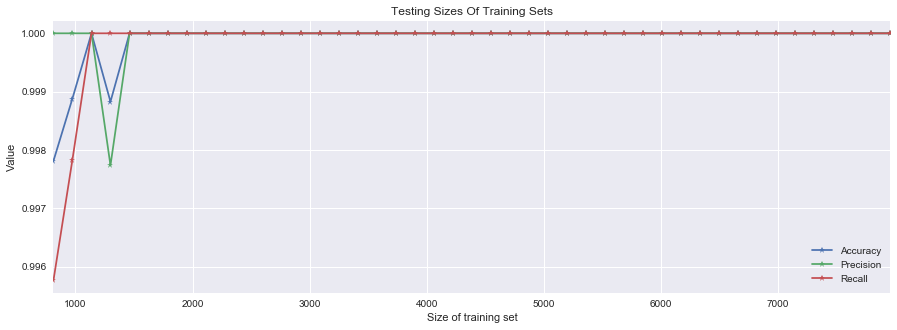

In [12]:
result = pd.DataFrame(result).transpose()
result.columns = ['Accuracy', 'Precision', 'Recall']
result.plot(marker='*', figsize=(15,5))
plt.title('Testing Sizes Of Training Sets')
plt.xlabel('Size of training set')
plt.ylabel('Value');


# K Fold Cross Validation For Decision Tree


"In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data."-Open ML

Below we implement the K Fold Cross Validation for 5,7, and 10 values of k

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, Y_train)
scores = cross_val_score(clf, X_dummy, Y_dummy, cv=5)

print("5-Fold Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

5-Fold Cross Validation Accuracy: 1.00 (+/- 0.01)


In [121]:

scores = cross_val_score(clf, X_dummy, Y_dummy, cv=7)

print("7-Fold Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

7-Fold Cross Validation Accuracy: 0.97 (+/- 0.14)


In [122]:

scores = cross_val_score(clf, X_dummy, Y_dummy, cv=10)

print("10-Fold Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

10-Fold Cross Validation Accuracy: 0.96 (+/- 0.19)


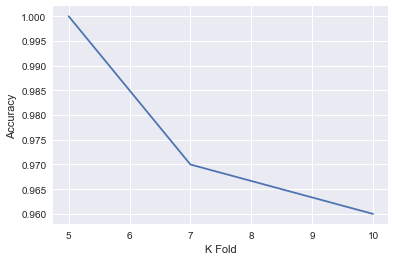

In [14]:
b = [1, .97, .96]
a = [5, 7, 10]
plt.xlabel('K Fold')
plt.ylabel('Accuracy')
plt.plot(a, b)
plt.show()

# K Fold Conclusion

Here we can see that Decision Trees are a great classifier for our data set. In past research, it has been shown that Decision Trees have produced the highest accuracy for the mushroom classifier. Decision Trees can tend to overfit data, and in large sets it is often wiser to choose a smaller K value. We can see that in our results and desplayed in our graph above, as a k value of 5 gave us the best accuracy.